In [1]:
from pyHalo.preset_models import CDM, WDM
import matplotlib.pyplot as plt
import numpy as np

In [2]:
zlens = 0.5
zsource = 2.0
subhalos_1 = CDM(zlens, zsource, LOS_normalization=0.0, sigma_sub=0.1,
                truncation_model_subhalos='ADIABATIC_TIDES', 
                 kwargs_trunction_model_subhalos={'log_m_host': 13, 'z_host': zlens})

subhalos_1_wdm = WDM(zlens, zsource, log_mc=7., LOS_normalization=0.0, sigma_sub=0.1,
                truncation_model_subhalos='ADIABATIC_TIDES', 
                 kwargs_trunction_model_subhalos={'log_m_host': 13, 'z_host': zlens})

kwargs_concentration_model = {'c0': 50.0, 'beta': 0.9, 'zeta': 1.1, 'scatter': False}
subhalos_1_v2 = CDM(zlens, zsource, LOS_normalization=0.0, sigma_sub=0.1,
                truncation_model_subhalos='ADIABATIC_TIDES', 
                 kwargs_trunction_model_subhalos={'log_m_host': 13, 'z_host': zlens},
                   concentration_model_subhalos='PEAK_HEIGHT_POWERLAW',
                   kwargs_concentration_model_subhalos=kwargs_concentration_model)

subhalos_2 = CDM(zlens, zsource, LOS_normalization=0.0, sigma_sub=0.1)

In [3]:
tau_1 = []
tau_2 = []
tau_1_wdm = []
tau_1_v2 = []

for halo in subhalos_1.halos:
    params_phys = halo.params_physical
    tau_1.append(params_phys['r_trunc_kpc']/params_phys['rs'])
for halo in subhalos_2.halos:
    params_phys = halo.params_physical
    tau_2.append(params_phys['r_trunc_kpc']/params_phys['rs'])
for halo in subhalos_1_wdm.halos:
    params_phys = halo.params_physical
    tau_1_wdm.append(params_phys['r_trunc_kpc']/params_phys['rs'])
for halo in subhalos_1_v2.halos:
    params_phys = halo.params_physical
    tau_1_v2.append(params_phys['r_trunc_kpc']/params_phys['rs'])

([], [])

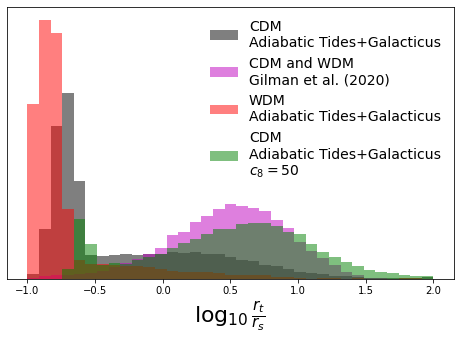

In [4]:
fig = plt.figure(1)
fig.set_size_inches(8,5)
_ = plt.hist(np.log10(tau_1),bins=35,range=(-1, 2.), color='k',alpha=0.5,density=True,
             label='CDM\nAdiabatic Tides+Galacticus')
_ = plt.hist(np.log10(tau_2),bins=35,range=(-1, 2.), color='m',alpha=0.5,density=True,
            label='CDM and WDM\nGilman et al. (2020)')
_ = plt.hist(np.log10(tau_1_wdm),bins=35,range=(-1,2.), color='r',alpha=0.5,density=True,
            label='WDM\nAdiabatic Tides+Galacticus')
_ = plt.hist(np.log10(tau_1_v2),bins=35,range=(-1,2.), color='g',alpha=0.5,density=True,
            label='CDM\nAdiabatic Tides+Galacticus\n'+r'$c_8 = 50$')

plt.xlabel(r'$\log_{10} \frac{r_t}{r_s}$', fontsize=22)
plt.legend(frameon=False,fontsize=14)
plt.yticks([])

In [5]:
zlens = 0.5
zsource = 2.0
LOS_1 = CDM(zlens, zsource, LOS_normalization=1.0, sigma_sub=0.0)
LOS_2 = CDM(zlens, zsource, LOS_normalization=1.0, sigma_sub=0.0,
           truncation_model_fieldhalos='SPLASHBACK')

In [6]:
tau_LOS_1 = []
tau_LOS_2 = []

for halo in LOS_1.halos:
    params_phys = halo.params_physical
    tau_LOS_1.append(params_phys['r_trunc_kpc']/params_phys['rs'])
for halo in LOS_2.halos:
    params_phys = halo.params_physical
    tau_LOS_2.append(params_phys['r_trunc_kpc']/params_phys['rs'])


([], [])

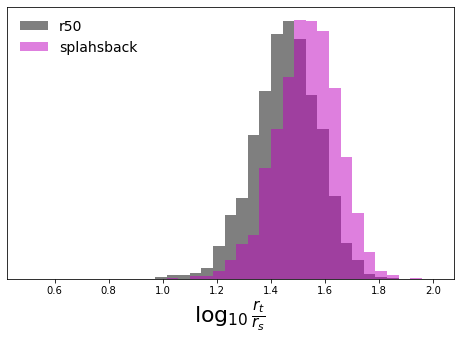

In [7]:
fig = plt.figure(1)
fig.set_size_inches(8,5)
_ = plt.hist(np.log10(tau_LOS_1),bins=35,range=(0.5, 2.0), color='k',alpha=0.5,density=True,
             label='r50')
_ = plt.hist(np.log10(tau_LOS_2),bins=35,range=(0.5, 2.0), color='m',alpha=0.5,density=True,
            label='splahsback')

plt.xlabel(r'$\log_{10} \frac{r_t}{r_s}$', fontsize=22)
plt.legend(frameon=False,fontsize=14)
plt.yticks([])